### Question 1: Apply Linear Regression to the Dataset 

We want to predict the income based on experience and age. 

Create a linear regression model that will return the weights for the features to get the income. Use the first 500 rows ONLY for training.  

# Result

- Create a function linear_reg(path), where path is the location of the csv file
- This function should load the file, train the model, and then test the model
- The function should return a 3-tuple, (coefficient array, intercept, R^2 of model when run on last 500 rows)
- E.g. ([12 ,   98], 10, 0.8)

## Initialization

In [1]:
# data management

import pandas as pd

# ML prediction

from sklearn.linear_model import LinearRegression

# visualization

import seaborn as sns
sns.set_theme(style="darkgrid")

# set path

path = 'HKUST_FinTech_Income_Dataset.csv'

In [2]:
# read table

df = pd.read_csv(path, index_col=0)

## Data Descriptive Statistics

In [12]:
df.describe()

,Experience,Age,Income
count,1000.000000,1000.000000,1000.000000
mean,4.508000,25.968000,61545.552000
std,2.854134,3.111375,37173.633425
min,0.000000,20.000000,697.000000
25%,2.000000,23.000000,28590.250000
50%,5.000000,26.000000,65876.500000
75%,7.000000,28.000000,93883.250000
max,9.000000,32.000000,122462.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
Experience    1000 non-null int64
Age           1000 non-null int64
Income        1000 non-null int64
dtypes: int64(3)
memory usage: 31.2 KB


## Data Visualization

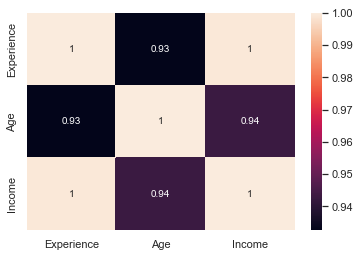

In [5]:
# correlation

sns.heatmap(df.corr(),annot=True)

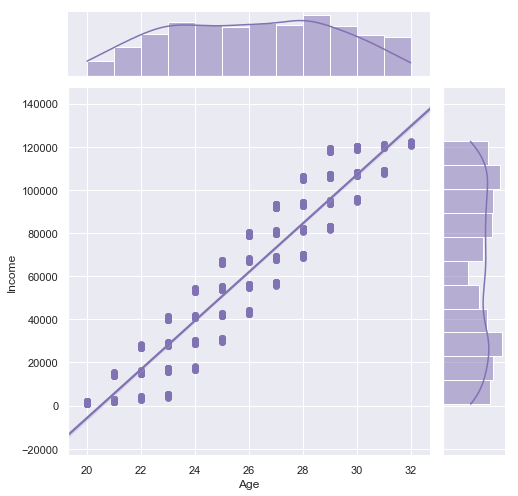

In [6]:
# simple linear regression visualized (Age)

sns.jointplot(x="Age", y="Income", data=df,kind="reg", truncate=False,color="m", height=7)

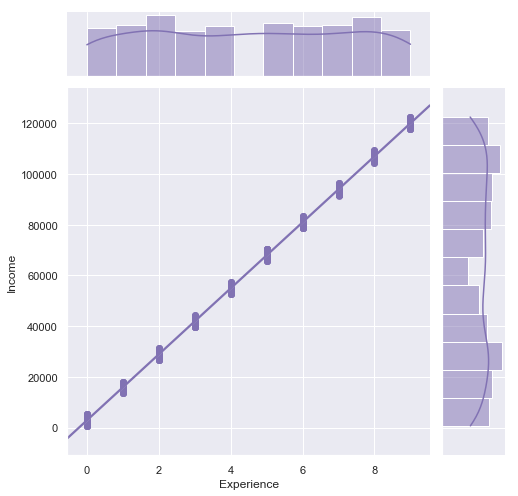

In [7]:
# simple linear regression visualized (Experience)

sns.jointplot(x="Experience", y="Income", data=df,kind="reg", truncate=False,color="m", height=7)

Based on the data visualization, we expect the linear regression model to have a positive relationship (coefficent) for Age and Experience with Income.

Note that the visualization shows that if you are under the age 20, then the Income would be negative. This interpretation implies that if you under the age 20, you are in debt.

## Model Tuning

As there are no parameters in sklearn Linear Regression, hyperparameter tuning will be omitted.

## Final Model

In [28]:
def linear_reg(path):
    df = pd.read_csv(path)
    train = df.iloc[0:500]
    test = df.iloc[500:]
    reg = LinearRegression().fit(train[['Experience','Age']], train['Income'])
    return (reg.coef_, reg.intercept_, reg.score(test[['Experience','Age']], test['Income']))

In [29]:
linear_reg(path)

(array([12019.6530681 ,   981.32363864]),
 -18132.51868161009,
 0.9997495920263997)

## Interpretation

The coefficient for Experience is 12,020 and for Age is 981. This means that when Experience and Age increases by 1 unit, Income will increase by 12,020 and 981, respectively.

The intercept is -18,132.5, which seems misleading; but this is mainly due to having negative Income when Age is less than 20. A polynomial fit would be better than linear in modeling the data.

The correlation coefficient is 0.9999, which is almost a perfect positive linear relationship. I believe that this model is overfitted and will have be tuned to account for that.